# DATASET
## 데이터셋설명
> 자동차 보험 청구 데이터 셋에는 보험 가입 기간, 자동차 연령, 자동차 소유자 연령, 도시의 인구 밀도, 자동차 제조업체 및 모델, 출력, 엔진 유형 등과 같은 속성을 가진 보험 계약자에 대한 정보와 이를 나타내는 대상 변수가 포함되며. 보험 계약자가 향후 6개월 이내에 청구서를 제출하는지 여부를 분류하기 위한 target이 있는 DATASET입니다.
### 익명처리를 거친 데이터로 고객의 개인정보와 관련된 피쳐들은 암호화가 되어있는 가상의 데이터셋입니다.

### [KAGGLE DATASET LINK](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification)


In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
app_train = pd.read_csv('./data/train.csv')
app_test = pd.read_csv('./data/test.csv')

In [3]:
app_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [6]:
app_train.shape, app_test.shape

((58592, 44), (39063, 43))

In [91]:
print(app_train[ app_train['is_claim']== 1 ].shape)
print(app_train[ app_train['is_claim']== 0 ].shape)

(3748, 23)
(54844, 23)


In [7]:
app_train.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
app_test.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
app_train['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [10]:
num_columns = app_train.dtypes[ (app_train.dtypes=='int64') | (app_train.dtypes=='float64')].index.tolist()
num_columns.remove('is_claim')
num_columns

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating']

In [11]:
object_columns = app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [12]:
def show_outlier_hist_by_target(df, columns):
    cond_1 = (df['is_claim'] == 1)
    cond_0 = (df['is_claim'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), squeeze=False)
        sns.boxplot(app_train[column])
        sns.violinplot(x='is_claim', y=column, data=df, ax=axs[0][0] )
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')

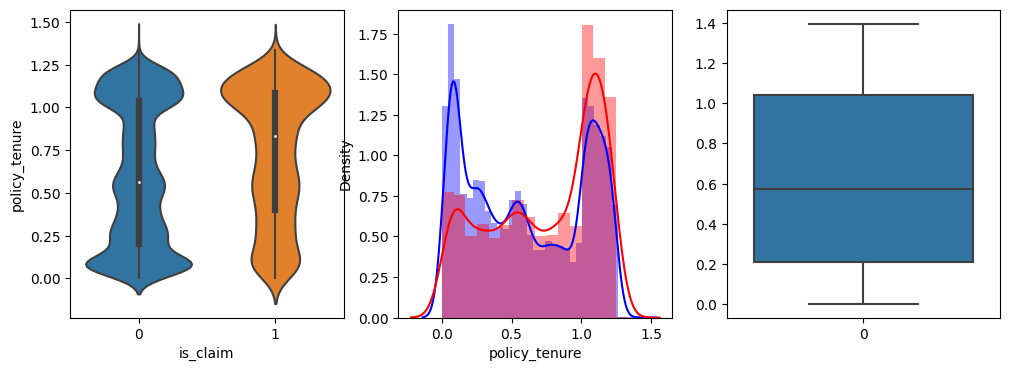

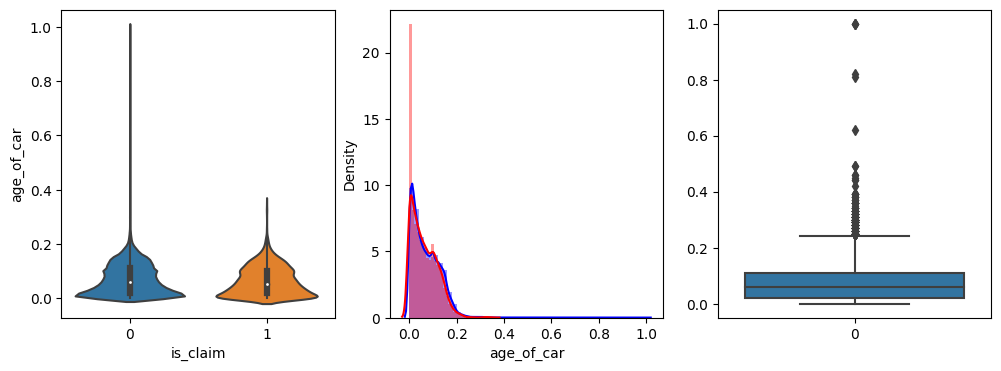

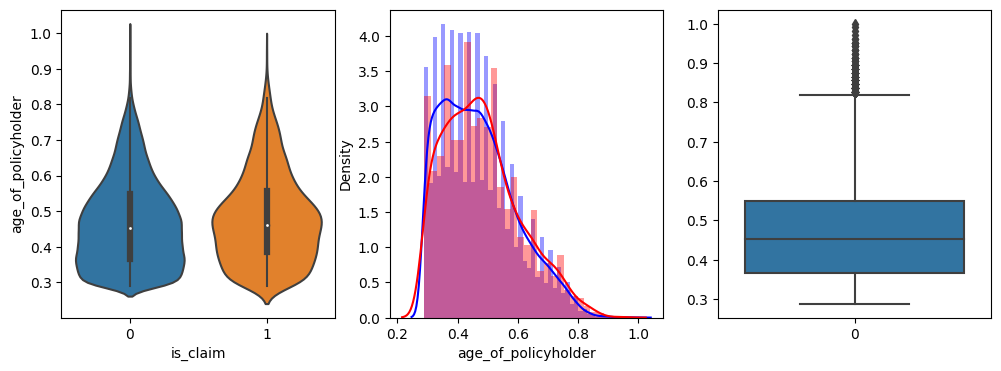

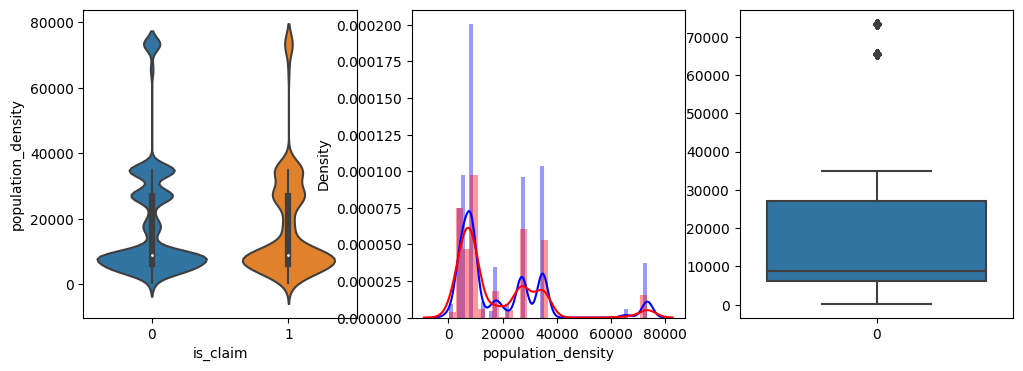

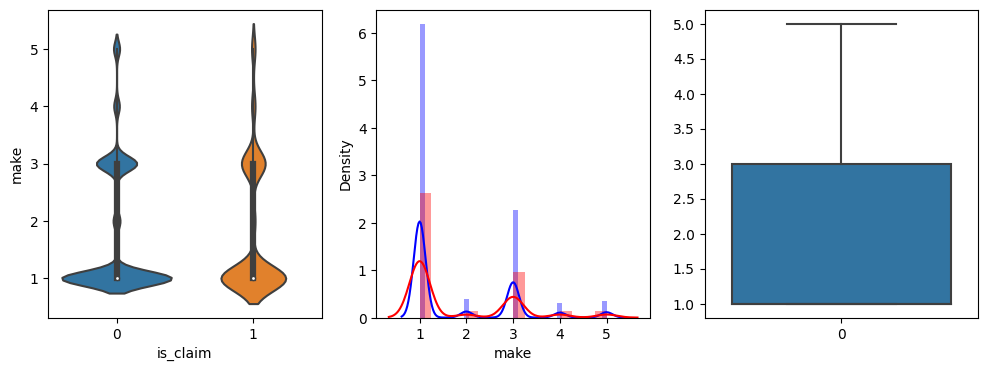

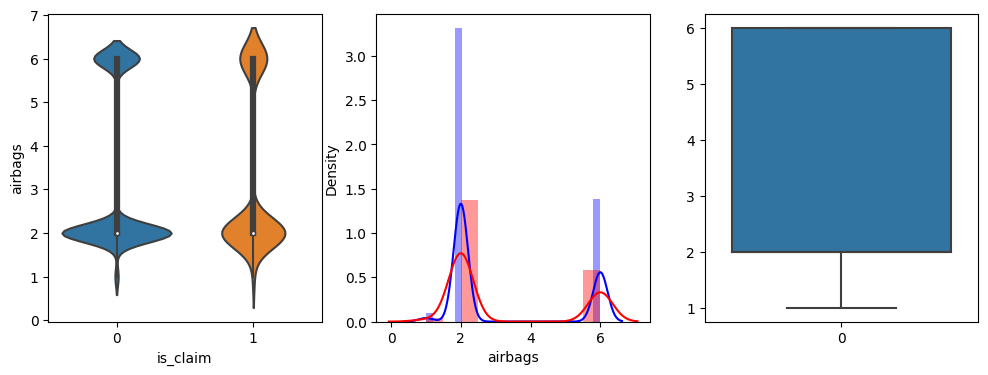

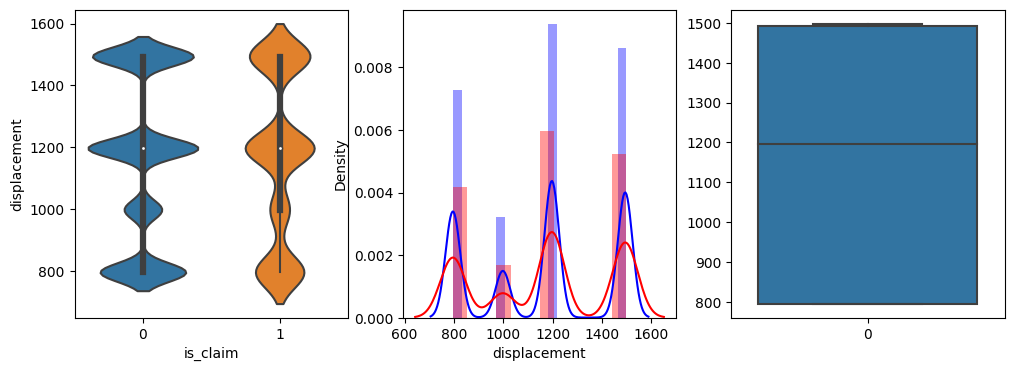

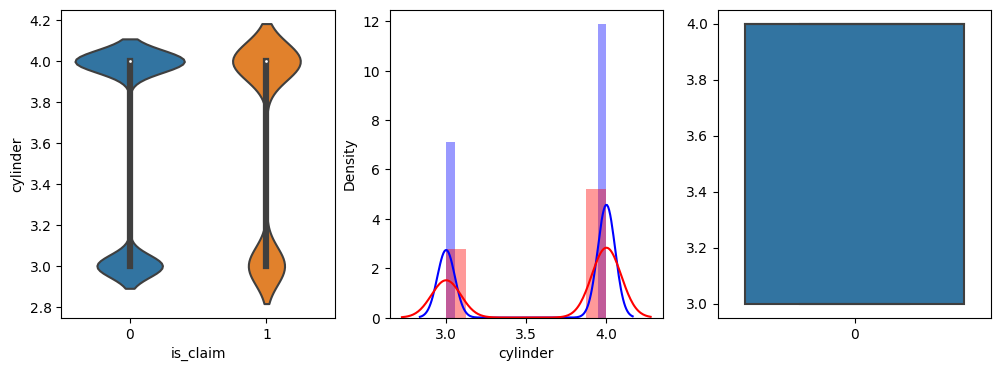

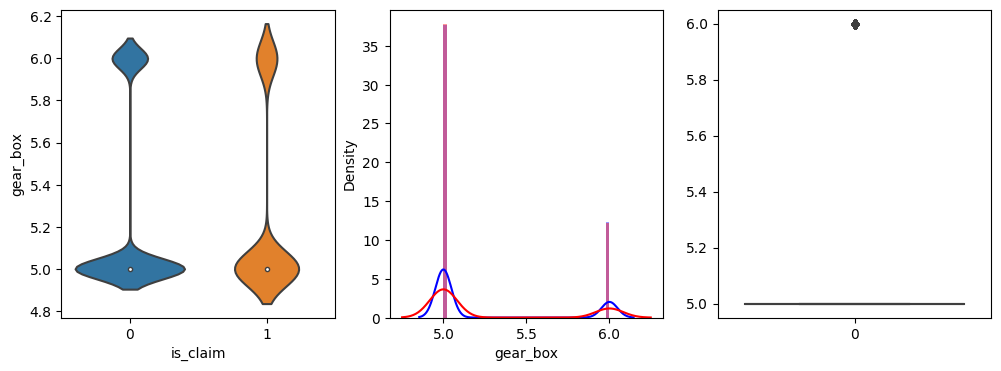

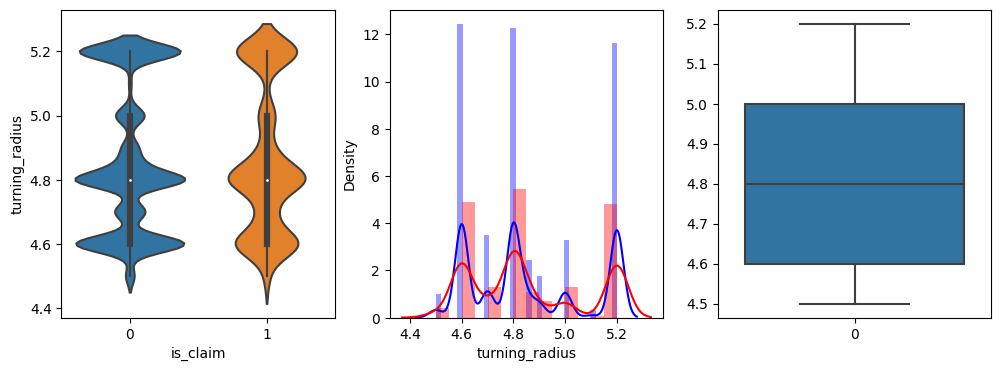

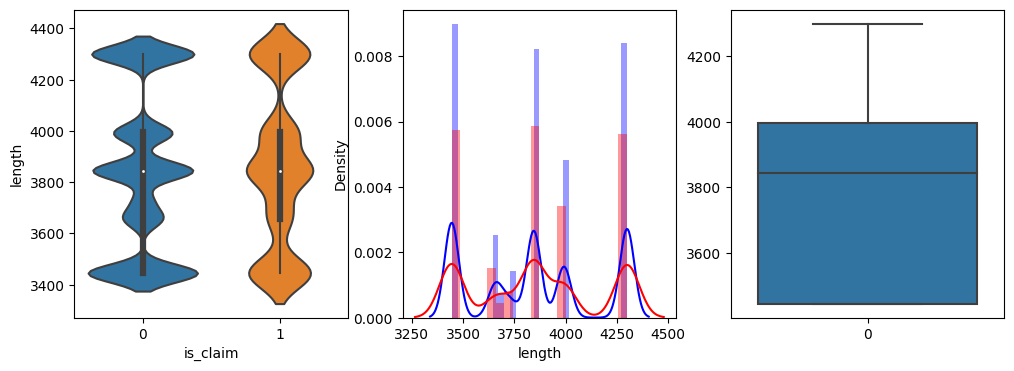

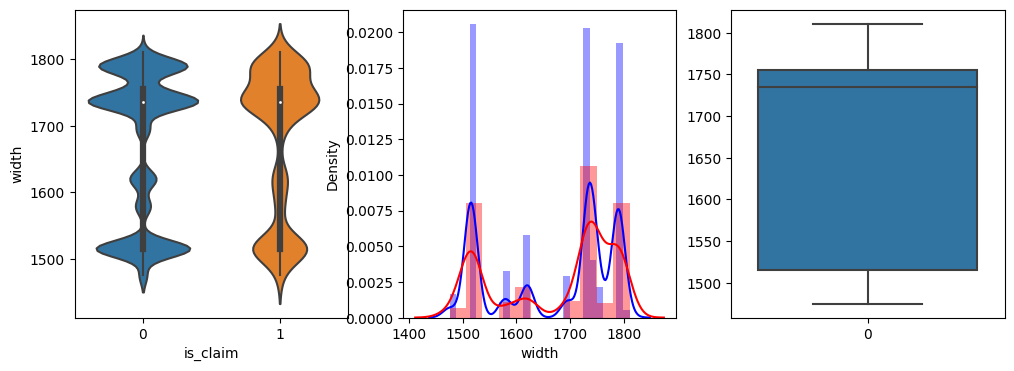

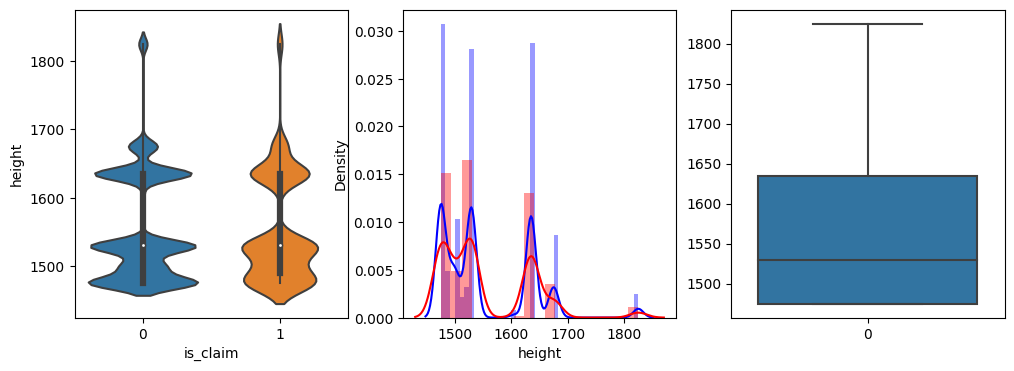

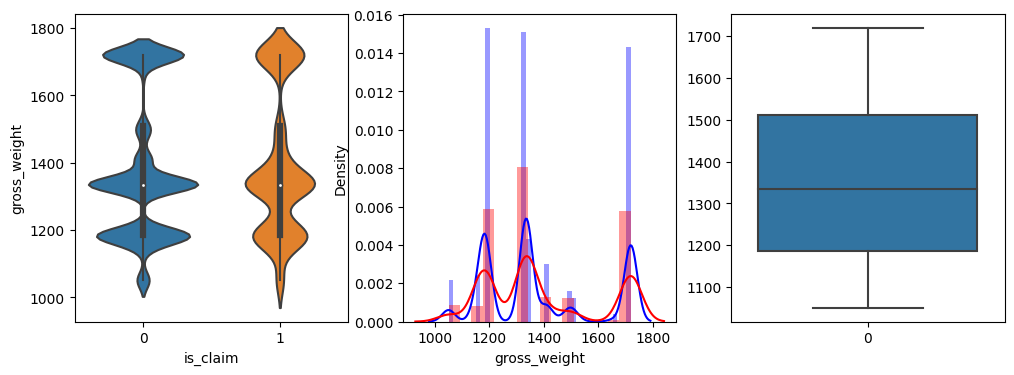

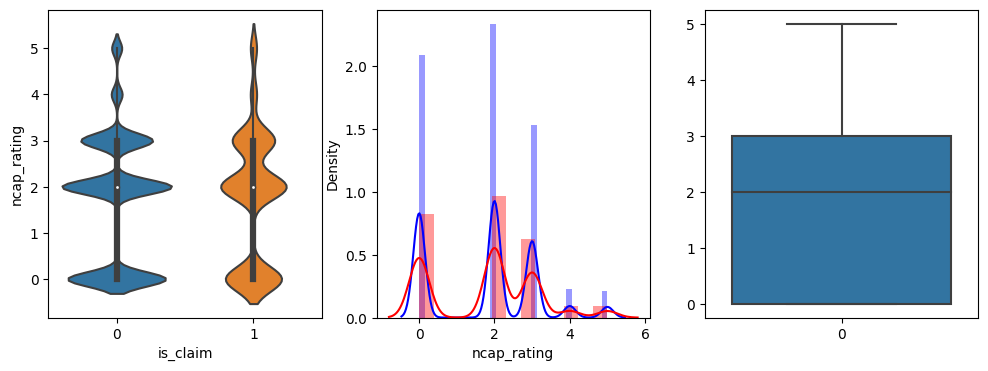

In [13]:
show_outlier_hist_by_target(app_train, num_columns)

In [14]:
app_train['gear_box'] = app_train['gear_box'].astype('object')
app_train['make'] = app_train['make'].astype('object')
app_train['airbags'] = app_train['airbags'].astype('object')
app_train['cylinder'] = app_train['cylinder'].astype('object')
app_train['ncap_rating'] = app_train['ncap_rating'].astype('object')


In [15]:
app_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [16]:
num_columns = app_train.dtypes[ (app_train.dtypes=='int64') | (app_train.dtypes=='float64')].index.tolist()
num_columns.remove('is_claim')
num_columns

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [17]:
app_train = app_train[ (app_train['population_density'] < 60000) |
                      (app_train['age_of_policyholder'] < 0.8) |
                      (app_train['age_of_car'] < 0.23) ]
app_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [18]:
object_columns

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [19]:
for object in object_columns:
    print(app_train[ object ].unique().argmax())

58591
8
5
8
1
2
6
8
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0


In [20]:
object_columns.remove('policy_id')

In [21]:
print(object_columns)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [22]:
for object in object_columns:
    if (app_train[ object ].unique().argmax() > 1):
        pass
    else:
        app_train = app_train.drop(columns=object)
        app_test = app_test.drop(columns=object)

In [23]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            39063 non-null  object 
 1   policy_tenure        39063 non-null  float64
 2   age_of_car           39063 non-null  float64
 3   age_of_policyholder  39063 non-null  float64
 4   area_cluster         39063 non-null  object 
 5   population_density   39063 non-null  int64  
 6   make                 39063 non-null  int64  
 7   segment              39063 non-null  object 
 8   model                39063 non-null  object 
 9   max_torque           39063 non-null  object 
 10  max_power            39063 non-null  object 
 11  engine_type          39063 non-null  object 
 12  airbags              39063 non-null  int64  
 13  displacement         39063 non-null  int64  
 14  cylinder             39063 non-null  int64  
 15  gear_box             39063 non-null 

In [24]:
object_columns = app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns.remove('policy_id')

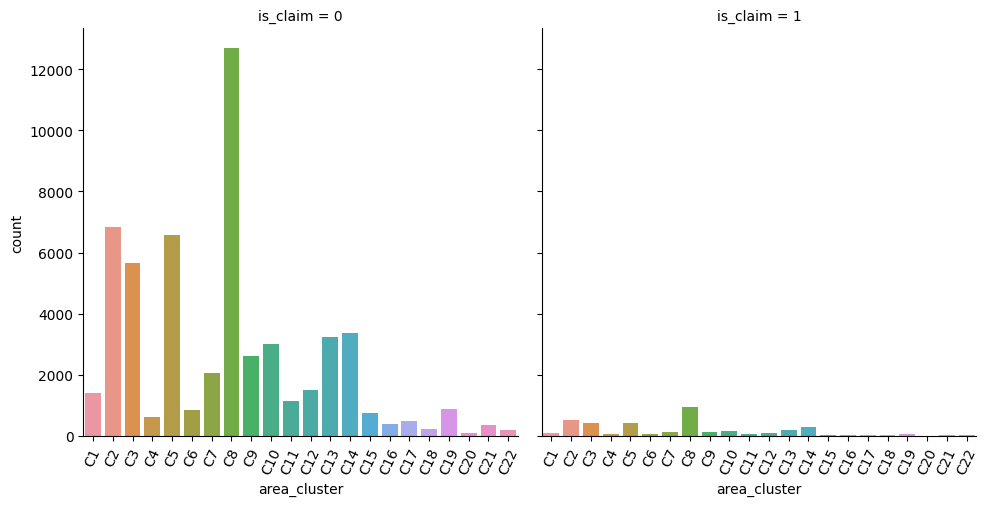

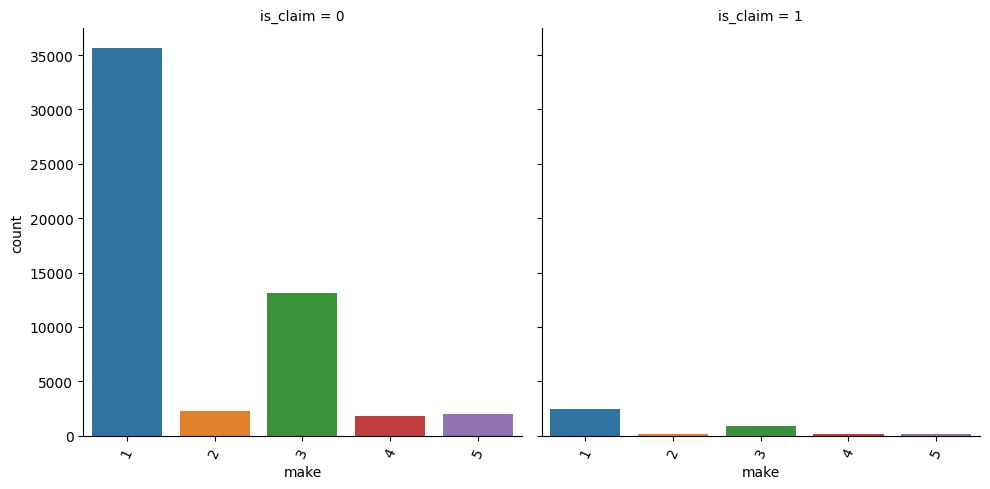

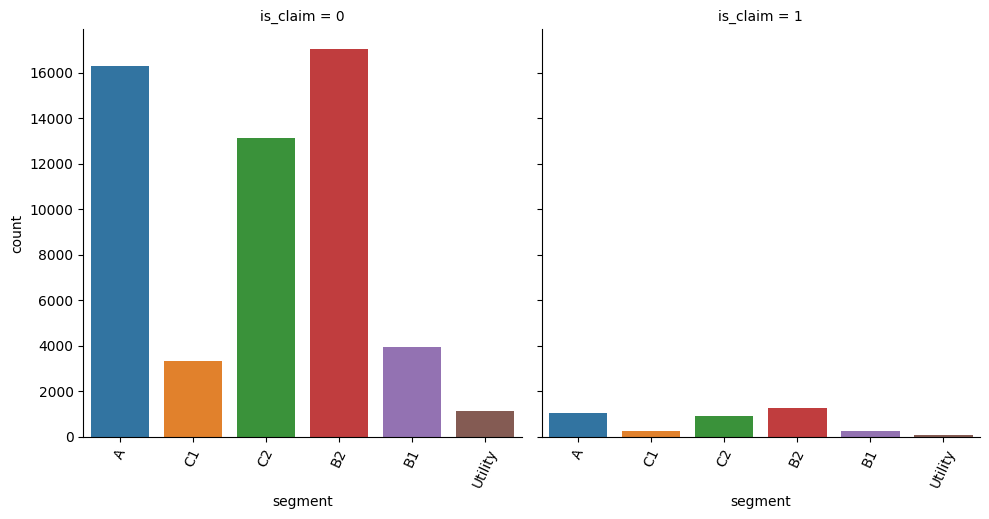

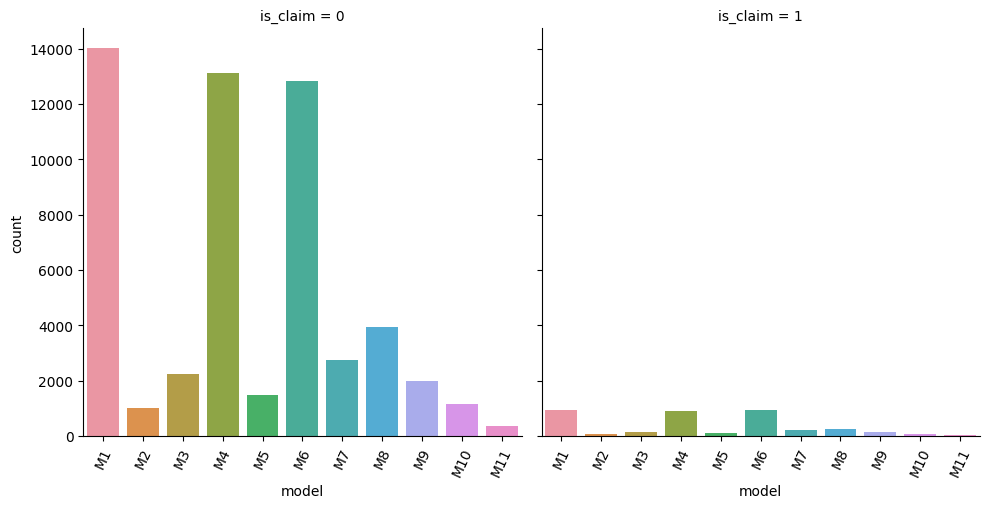

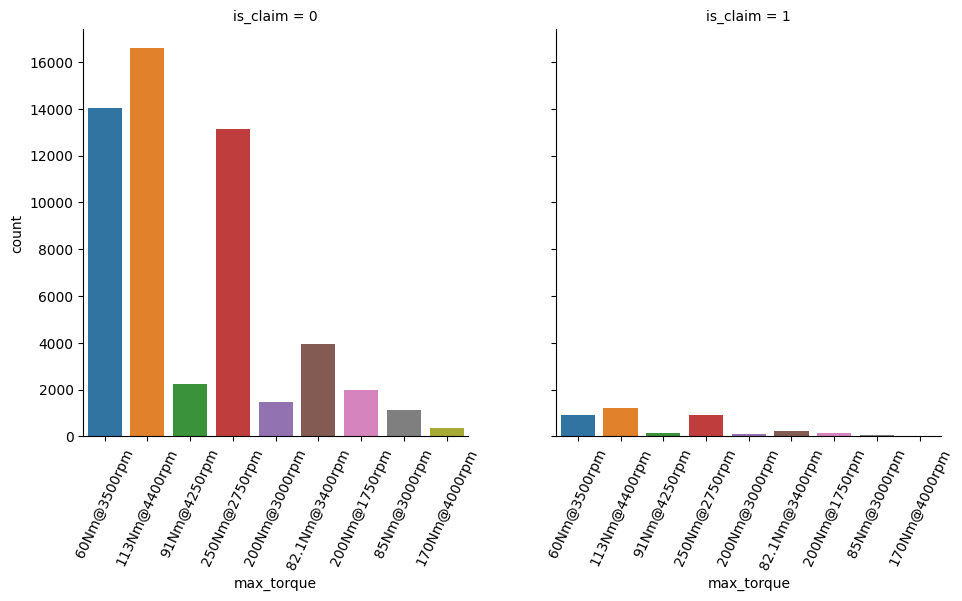

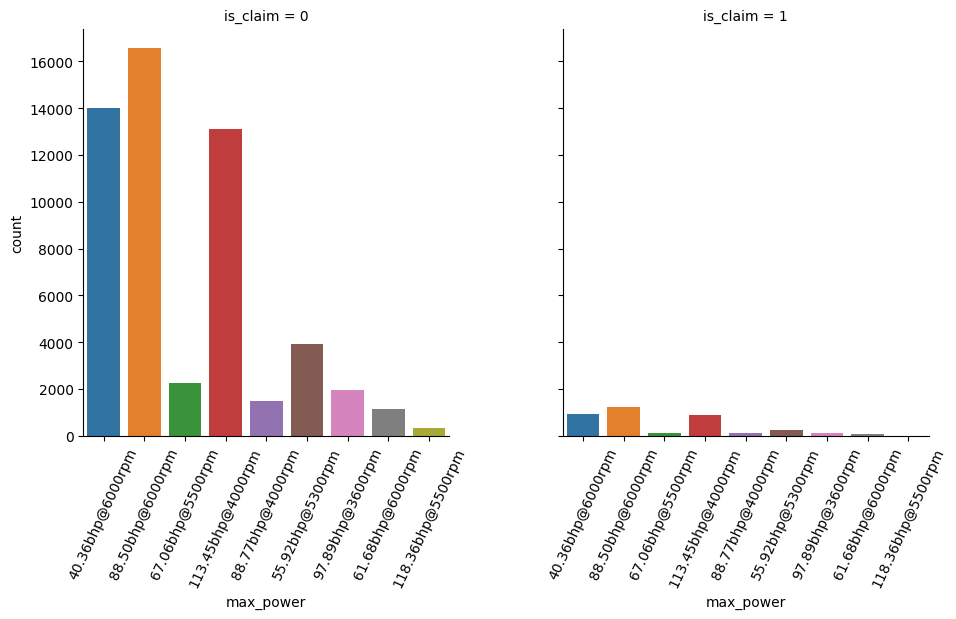

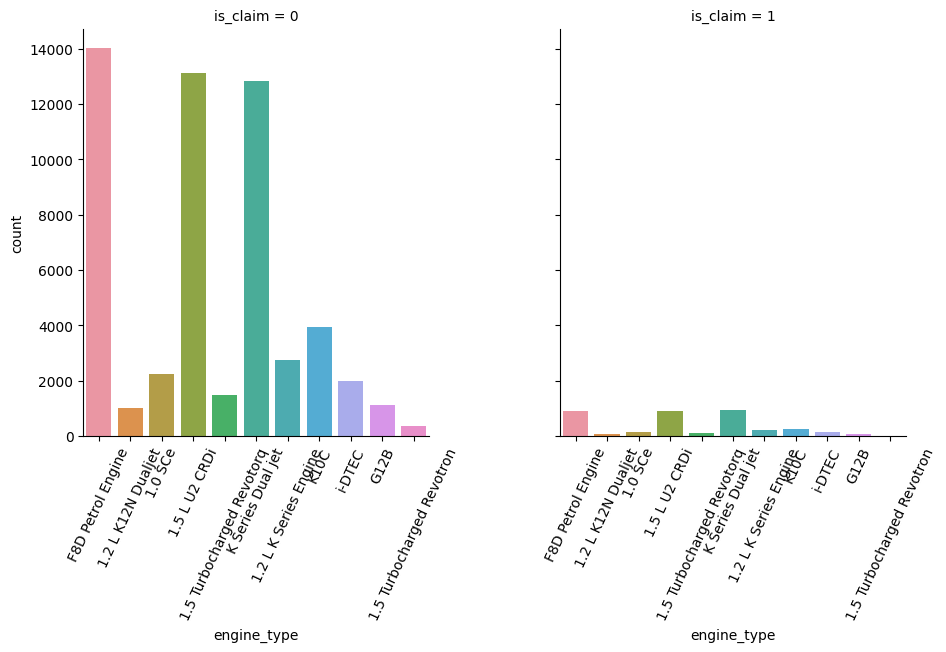

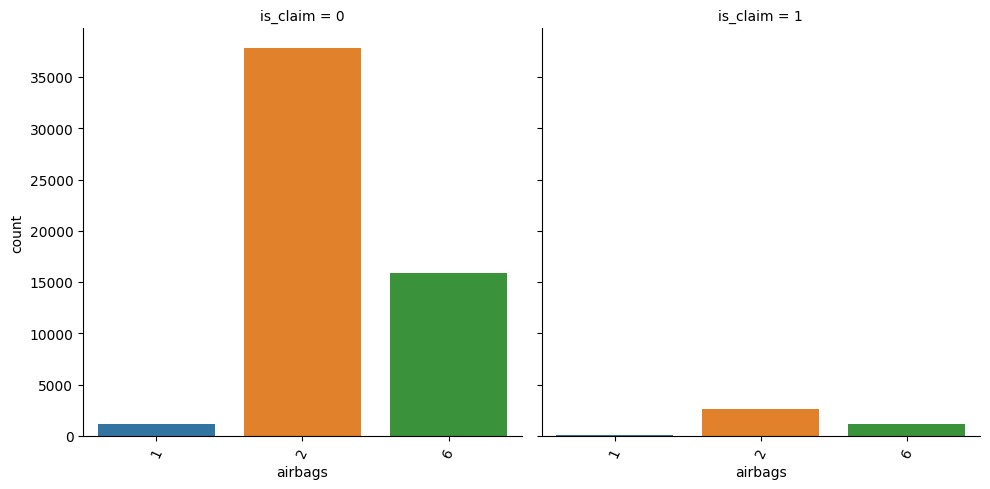

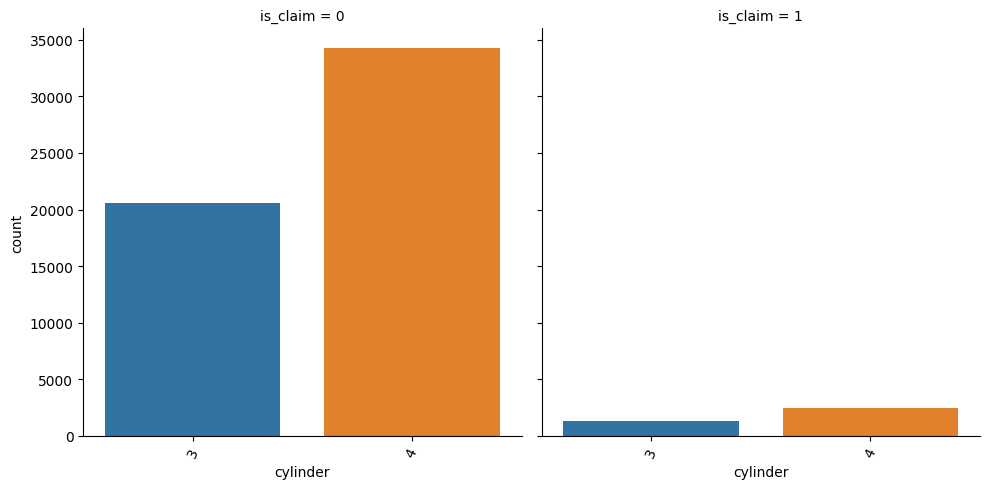

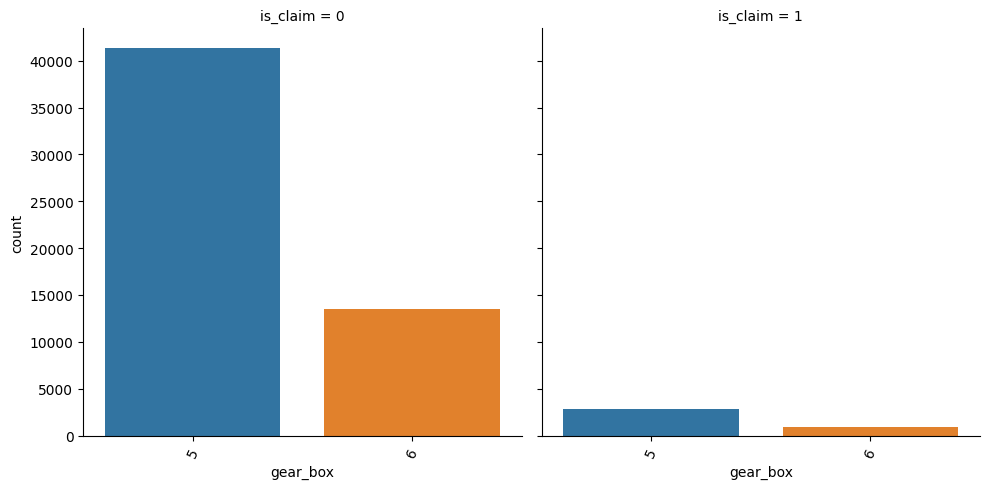

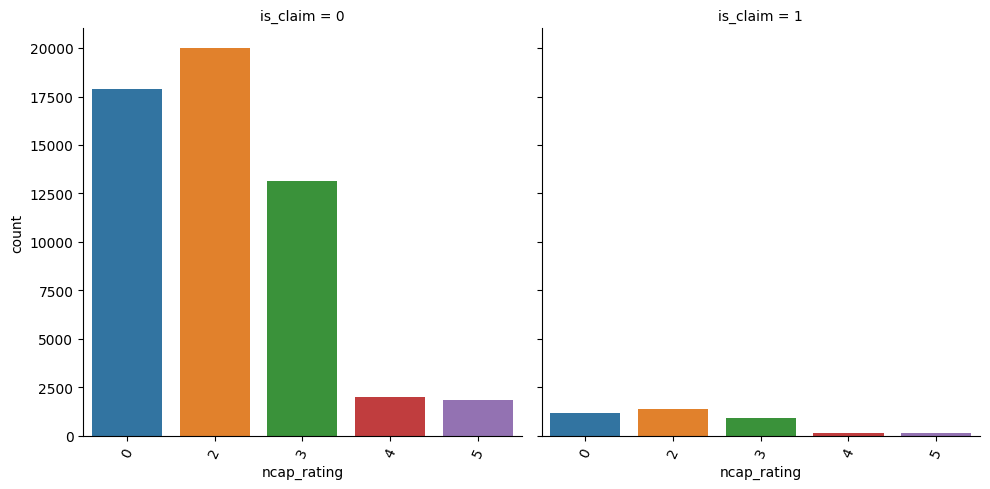

In [25]:
# catplot을 이용하여 TARGET별로 여러컬럼의 category 값 Histogram을 표현 
def show_category_by_target(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col="is_claim", data=df, kind="count")
        chart.set_xticklabels(rotation=65)
        
show_category_by_target(app_train, object_columns)

In [26]:
num_columns.append('is_claim')

In [27]:
corr = app_train[num_columns].corr()

<Axes: >

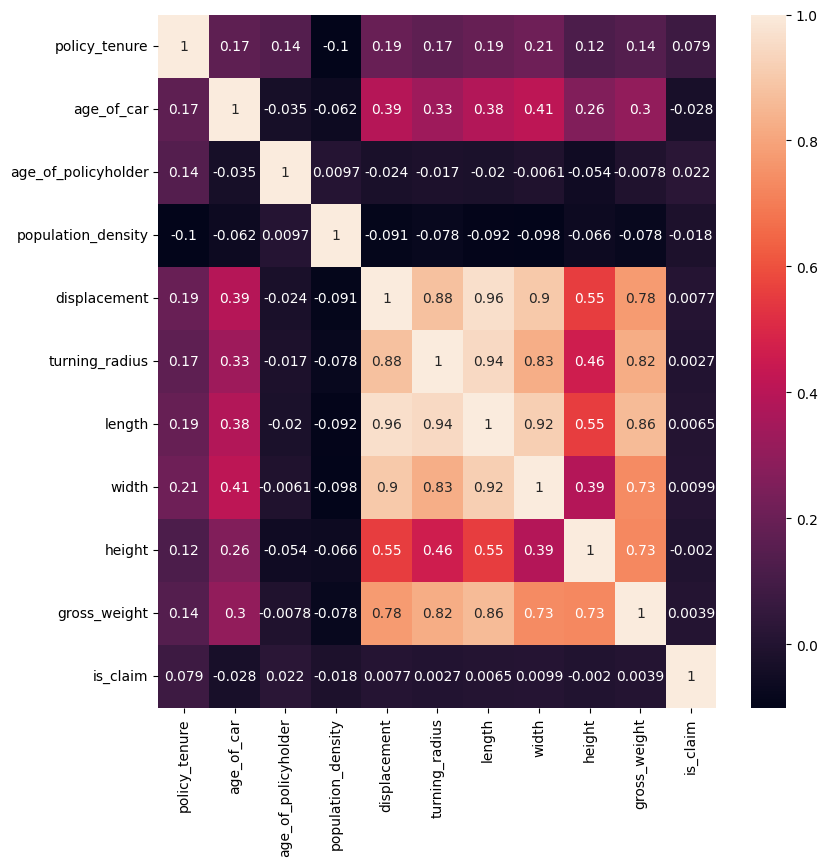

In [28]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True)

In [29]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([app_train, app_test])
apps.shape

(97655, 23)

In [30]:
# app_train의 TARGET 값을 Null로 입력됨. 
apps['is_claim'].value_counts(dropna=False)

is_claim
0.0    54844
NaN    39063
1.0     3748
Name: count, dtype: int64

In [31]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [32]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97655 entries, 0 to 39062
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            97655 non-null  object 
 1   policy_tenure        97655 non-null  float64
 2   age_of_car           97655 non-null  float64
 3   age_of_policyholder  97655 non-null  float64
 4   area_cluster         97655 non-null  int64  
 5   population_density   97655 non-null  int64  
 6   make                 97655 non-null  int64  
 7   segment              97655 non-null  int64  
 8   model                97655 non-null  int64  
 9   max_torque           97655 non-null  int64  
 10  max_power            97655 non-null  int64  
 11  engine_type          97655 non-null  int64  
 12  airbags              97655 non-null  int64  
 13  displacement         97655 non-null  int64  
 14  cylinder             97655 non-null  int64  
 15  gear_box             97655 non-null  int6

In [33]:
apps.isnull().sum().head(100)

policy_id                  0
policy_tenure              0
age_of_car                 0
age_of_policyholder        0
area_cluster               0
population_density         0
make                       0
segment                    0
model                      0
max_torque                 0
max_power                  0
engine_type                0
airbags                    0
displacement               0
cylinder                   0
gear_box                   0
turning_radius             0
length                     0
width                      0
height                     0
gross_weight               0
ncap_rating                0
is_claim               39063
dtype: int64

In [34]:
# -999로 모든 컬럼들의 Null값 변환
apps = apps.fillna(-999)

In [35]:
apps.isnull().sum().head(100)

policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
area_cluster           0
population_density     0
make                   0
segment                0
model                  0
max_torque             0
max_power              0
engine_type            0
airbags                0
displacement           0
cylinder               0
gear_box               0
turning_radius         0
length                 0
width                  0
height                 0
gross_weight           0
ncap_rating            0
is_claim               0
dtype: int64

In [36]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['is_claim'] != -999]
app_test = apps[apps['is_claim']== -999]
app_train.shape, app_test.shape

((58592, 23), (39063, 23))

In [37]:
app_train

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,max_torque,max_power,engine_type,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,0,4990,0,0,0,0,0,0,0,796,0,0,4.6,3445,1515,1475,1185,0,0.0
1,ID00002,0.672619,0.02,0.375000,1,27003,0,0,0,0,0,0,0,796,0,0,4.6,3445,1515,1475,1185,0,0.0
2,ID00003,0.841110,0.02,0.384615,2,4076,0,0,0,0,0,0,0,796,0,0,4.6,3445,1515,1475,1185,0,0.0
3,ID00004,0.900277,0.11,0.432692,3,21622,0,1,1,1,1,1,0,1197,1,0,4.8,3995,1735,1515,1335,1,0.0
4,ID00005,0.596403,0.11,0.634615,4,34738,1,0,2,2,2,2,0,999,0,0,5.0,3731,1579,1490,1155,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,7,8794,1,0,2,2,2,2,0,999,0,0,5.0,3731,1579,1490,1155,1,0.0
58588,ID58589,1.199642,0.02,0.519231,13,7788,0,0,0,0,0,0,0,796,0,0,4.6,3445,1515,1475,1185,0,0.0
58589,ID58590,1.162273,0.05,0.451923,4,34738,0,0,0,0,0,0,0,796,0,0,4.6,3445,1515,1475,1185,0,0.0
58590,ID58591,1.236307,0.14,0.557692,7,8794,0,3,5,1,1,5,0,1197,1,0,4.8,3845,1735,1530,1335,1,0.0


In [38]:
ftr_app = app_train.drop(['policy_id', 'is_claim'], axis=1)
target_app = app_train['is_claim']

In [39]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((41014, 21), (17578, 21))

In [95]:
valid_y

11890    0.0
36323    0.0
22760    0.0
43620    0.0
28763    0.0
        ... 
11856    0.0
53927    0.0
855      0.0
44936    0.0
38392    0.0
Name: is_claim, Length: 17578, dtype: float64

In [40]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'accuracy')

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000, n_jobs=-1,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

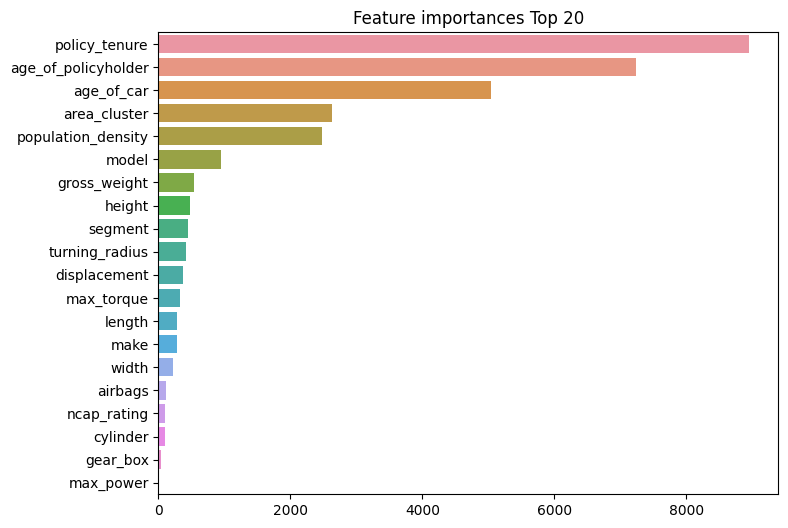

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_ ## feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [42]:
preds = clf.predict(valid_x)
#학습된 classifier의 predict_proba()를 이용하여 binary classification에서 1이될 확률만 추출
pred_proba = clf.predict_proba(valid_x)[:, 1 ]

In [43]:
app_test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,max_torque,max_power,engine_type,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,ID58593,0.341732,0.00,0.586538,2,4076,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0
1,ID58594,0.307241,0.13,0.442308,7,8794,0,3,5,1,1,5,0,1197,1,0,4.80,3845,1735,1530,1335,1,-999.0
2,ID58595,0.327924,0.12,0.451923,7,8794,1,0,2,2,2,2,0,999,0,0,5.00,3731,1579,1490,1155,1,-999.0
3,ID58596,0.782654,0.01,0.461538,4,34738,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0
4,ID58597,1.233404,0.02,0.634615,4,34738,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,1,27003,0,3,5,1,1,5,0,1197,1,0,4.80,3845,1735,1530,1335,1,-999.0
39059,ID97652,1.224838,0.05,0.509615,7,8794,2,2,3,3,3,3,1,1493,1,1,5.20,4300,1790,1635,1720,2,-999.0
39060,ID97653,0.520287,0.12,0.355769,5,13051,0,3,6,1,1,6,1,1197,1,0,4.85,3990,1745,1500,1410,0,-999.0
39061,ID97654,1.172391,0.08,0.644231,4,34738,0,1,1,1,1,1,0,1197,1,0,4.80,3995,1735,1515,1335,1,-999.0


In [44]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
valid_y

11890    0.0
36323    0.0
22760    0.0
43620    0.0
28763    0.0
        ... 
11856    0.0
53927    0.0
855      0.0
44936    0.0
38392    0.0
Name: is_claim, Length: 17578, dtype: float64

In [46]:
model = clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc')

In [47]:
## 모델 성능 평가 함수 선언
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(valid_y, pred=None, pred_proba=None):

    confusion = confusion_matrix(valid_y, pred)
    accuracy = accuracy_score(valid_y, pred)
    precision = precision_score(valid_y, pred, average=None)[0]
    recall = recall_score(valid_y, pred, average=None)[0]
    f1 = f1_score(valid_y, pred, average=None)[0]
    roc_auc = roc_auc_score(valid_y, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(valid_y, preds, pred_proba)

오차 행렬
[[16455     0]
 [ 1122     1]]
정확도: 0.9362, 정밀도: 0.9362, 재현율: 1.0000, F1: 0.9670, AUC: 0.6386


---

## Feature Scaled

In [48]:
num_columns

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_claim']

In [49]:
app_test_scale_feature =['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [50]:
# 데이터 스케일 조정하기
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler() ##

for feature in app_test_scale_feature:
    app_test['scaled_{}'.format(feature)] = rob_scaler.fit_transform(app_test[feature].values.reshape(-1,1))

app_test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,max_torque,max_power,engine_type,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,scaled_policy_tenure,scaled_age_of_car,scaled_age_of_policyholder,scaled_population_density,scaled_displacement,scaled_turning_radius,scaled_length,scaled_width,scaled_height,scaled_gross_weight
0,ID58593,0.341732,0.00,0.586538,2,4076,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0,-0.279270,-0.666667,0.777778,-0.225839,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
1,ID58594,0.307241,0.13,0.442308,7,8794,0,3,5,1,1,5,0,1197,1,0,4.80,3845,1735,1530,1335,1,-999.0,-0.320726,0.777778,-0.055556,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000
2,ID58595,0.327924,0.12,0.451923,7,8794,1,0,2,2,2,2,0,999,0,0,5.00,3731,1579,1490,1155,1,-999.0,-0.295866,0.666667,0.000000,0.000000,-0.284075,0.500,-0.207273,-0.650000,-0.25000,-0.553846
3,ID58596,0.782654,0.01,0.461538,4,34738,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0,0.250699,-0.555556,0.055556,1.241874,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
4,ID58597,1.233404,0.02,0.634615,4,34738,0,0,0,0,0,0,0,796,0,0,4.60,3445,1515,1475,1185,0,-999.0,0.792481,-0.444444,1.055556,1.241874,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,1,27003,0,3,5,1,1,5,0,1197,1,0,4.80,3845,1735,1530,1335,1,-999.0,-0.632343,1.000000,1.666667,0.871619,0.000000,0.000,0.000000,0.000000,0.00000,0.000000
39059,ID97652,1.224838,0.05,0.509615,7,8794,2,2,3,3,3,3,1,1493,1,1,5.20,4300,1790,1635,1720,2,-999.0,0.782185,-0.111111,0.333333,0.000000,0.424677,1.000,0.827273,0.229167,0.65625,1.184615
39060,ID97653,0.520287,0.12,0.355769,5,13051,0,3,6,1,1,6,1,1197,1,0,4.85,3990,1745,1500,1410,0,-999.0,-0.064654,0.666667,-0.555556,0.203772,0.000000,0.125,0.263636,0.041667,-0.18750,0.230769
39061,ID97654,1.172391,0.08,0.644231,4,34738,0,1,1,1,1,1,0,1197,1,0,4.80,3995,1735,1515,1335,1,-999.0,0.719145,0.222222,1.111111,1.241874,0.000000,0.000,0.272727,0.000000,-0.09375,0.000000


In [51]:
# 원 데이터에서 scale된 컬럼제거
app_test.drop(app_test_scale_feature , axis=1, inplace=True)

In [52]:
app_test

,policy_id,area_cluster,make,segment,model,max_torque,max_power,engine_type,airbags,cylinder,gear_box,ncap_rating,is_claim,scaled_policy_tenure,scaled_age_of_car,scaled_age_of_policyholder,scaled_population_density,scaled_displacement,scaled_turning_radius,scaled_length,scaled_width,scaled_height,scaled_gross_weight
0,ID58593,2,0,0,0,0,0,0,0,0,0,0,-999.0,-0.279270,-0.666667,0.777778,-0.225839,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
1,ID58594,7,0,3,5,1,1,5,0,1,0,1,-999.0,-0.320726,0.777778,-0.055556,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000
2,ID58595,7,1,0,2,2,2,2,0,0,0,1,-999.0,-0.295866,0.666667,0.000000,0.000000,-0.284075,0.500,-0.207273,-0.650000,-0.25000,-0.553846
3,ID58596,4,0,0,0,0,0,0,0,0,0,0,-999.0,0.250699,-0.555556,0.055556,1.241874,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
4,ID58597,4,0,0,0,0,0,0,0,0,0,0,-999.0,0.792481,-0.444444,1.055556,1.241874,-0.575323,-0.500,-0.727273,-0.916667,-0.34375,-0.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,1,0,3,5,1,1,5,0,1,0,1,-999.0,-0.632343,1.000000,1.666667,0.871619,0.000000,0.000,0.000000,0.000000,0.00000,0.000000
39059,ID97652,7,2,2,3,3,3,3,1,1,1,2,-999.0,0.782185,-0.111111,0.333333,0.000000,0.424677,1.000,0.827273,0.229167,0.65625,1.184615
39060,ID97653,5,0,3,6,1,1,6,1,1,0,0,-999.0,-0.064654,0.666667,-0.555556,0.203772,0.000000,0.125,0.263636,0.041667,-0.18750,0.230769
39061,ID97654,4,0,1,1,1,1,1,0,1,0,1,-999.0,0.719145,0.222222,1.111111,1.241874,0.000000,0.000,0.272727,0.000000,-0.09375,0.000000


## SMOTE

In [53]:
sum(np.array(train_y)==1)

2625

In [54]:
sum(np.array(train_y)==0)

38389

In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(train_x,list(train_y))

print('Before SMOTE, original X_train: {}'.format(train_x.shape))
print('Before SMOTE, original y_train: {}'.format(np.array(train_y).shape))

print('After  SMOTE, resampled original X_train: {}'.format(X_resampled.shape))
print('After  SMOTE, resampled original y_train: {} \n'.format(np.array(y_resampled).shape))

print("Before SMOTE,     is_claim counts: {}".format(sum(np.array(train_y)==1)))
print("Before SMOTE, non-claim counts: {}".format(sum(np.array(train_y)==0)))

print("After  SMOTE,     is_claim counts: {}".format(sum(np.array(y_resampled)==1)))
print("After  SMOTE, non-claim counts: {}".format(sum(np.array(y_resampled)==0)))

Before SMOTE, original X_train: (41014, 21)
Before SMOTE, original y_train: (41014,)
After  SMOTE, resampled original X_train: (76778, 21)
After  SMOTE, resampled original y_train: (76778,) 

Before SMOTE,     is_claim counts: 2625
Before SMOTE, non-claim counts: 38389
After  SMOTE,     is_claim counts: 38389
After  SMOTE, non-claim counts: 38389


In [56]:
smote_X_train = X_resampled.values
smote_X_test = valid_x.values
smote_y_train = np.array(y_resampled)
smote_y_test = valid_y.values

In [57]:
from lightgbm import LGBMClassifier

clf_smote = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf_smote.fit(smote_X_train, smote_y_train, eval_set=[(X_resampled, y_resampled), (smote_X_test, smote_y_test)], 
eval_metric= 'accuracy')

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000, n_jobs=-1,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

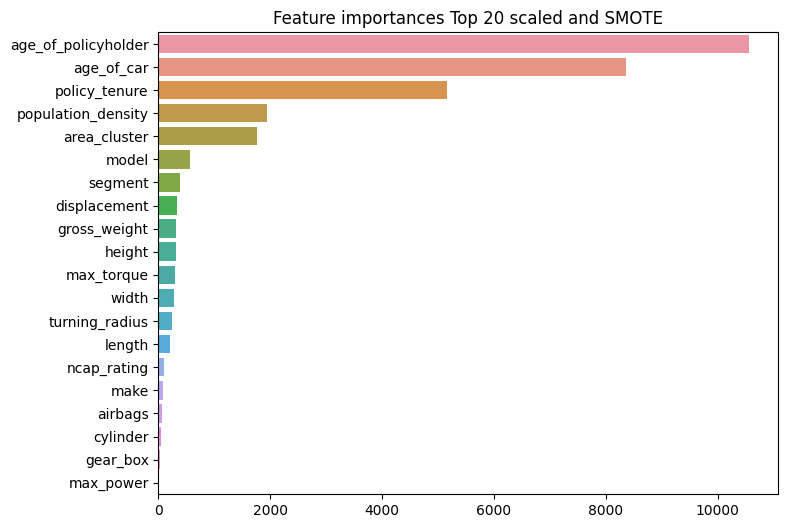

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf_smote.feature_importances_ ## feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 scaled and SMOTE')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [59]:
preds_smote = clf_smote.predict(smote_X_test)
#학습된 classifier의 predict_proba()를 이용하여 binary classification에서 1이될 확률만 추출
pred_proba_smote = clf_smote.predict_proba(smote_X_test)[:, 1 ]

In [60]:
preds_smote

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
## 모델 성능 평가 함수 선언
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_smote_eval(smote_y_test, preds_smote=None, pred_proba_smote=None):

    confusion = confusion_matrix(smote_y_test, preds_smote)
    accuracy = accuracy_score(smote_y_test, preds_smote)
    precision = precision_score(smote_y_test, preds_smote, average=None)[0]
    recall = recall_score(smote_y_test, preds_smote, average=None)[0]
    f1 = f1_score(smote_y_test, preds_smote, average=None)[0]
    roc_auc = roc_auc_score(smote_y_test, pred_proba_smote)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


get_clf_smote_eval(smote_y_test, preds_smote, pred_proba_smote)

오차 행렬
[[16418    37]
 [ 1118     5]]
정확도: 0.9343, 정밀도: 0.9362, 재현율: 0.9978, F1: 0.9660, AUC: 0.6414


In [62]:
get_clf_smote_eval(smote_y_test, preds_smote, pred_proba_smote)

오차 행렬
[[16418    37]
 [ 1118     5]]
정확도: 0.9343, 정밀도: 0.9362, 재현율: 0.9978, F1: 0.9660, AUC: 0.6414


---
여러 모델 확인해보기

In [63]:
# 학습시킬 모델 로드하기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    # "K Nearest": KNeighborsClassifier(),
    # "Support Vector Classifier": SVC(),
    # "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "LightGBM Classifier": LGBMClassifier()
}

In [75]:
# 모델별 cross validation 한 결과의 평균 정확도 점수 출력하기
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(smote_X_train, smote_y_train)
    training_score = cross_val_score(classifier, smote_X_train, smote_y_train, cv=5)
    print(classifier.__class__.__name__, ':', round(training_score.mean(), 2) * 100, '% accuracy')

LogisticRegression : 52.0 % accuracy
RandomForestClassifier : 91.0 % accuracy
GradientBoostingClassifier : 90.0 % accuracy
[LightGBM] [Info] Number of positive: 38389, number of negative: 38389
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 76778, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 30711, number of negative: 30711
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 61422, number of used features: 21
[LightGBM] [In

In [78]:
# 모델별 분류결과 확인하기
from sklearn.metrics import classification_report

for key, classifier in classifiers.items():
    y_pred = classifier.predict(smote_X_train) ####
    results = classification_report(smote_y_train, y_pred) ####
    print(classifier.__class__.__name__, '-------','\n', results)

LogisticRegression ------- 
               precision    recall  f1-score   support

         0.0       0.52      0.41      0.46     38389
         1.0       0.51      0.62      0.56     38389

    accuracy                           0.52     76778
   macro avg       0.52      0.52      0.51     76778
weighted avg       0.52      0.52      0.51     76778

RandomForestClassifier ------- 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38389
         1.0       1.00      1.00      1.00     38389

    accuracy                           1.00     76778
   macro avg       1.00      1.00      1.00     76778
weighted avg       1.00      1.00      1.00     76778

GradientBoostingClassifier ------- 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     38389
         1.0       0.95      0.86      0.90     38389

    accuracy                           0.91     76778
   macro avg       0.91      

In [79]:
from sklearn.metrics import confusion_matrix

for key, classifier in classifiers.items():
    y_pred = classifier.predict(smote_X_test) ####
    cm = confusion_matrix(smote_y_test, y_pred) ####
    print(classifier.__class__.__name__, '\n', cm, '\n')

LogisticRegression 
 [[6717 9738]
 [ 417  706]] 

RandomForestClassifier 
 [[15035  1420]
 [  974   149]] 

GradientBoostingClassifier 
 [[15677   778]
 [ 1000   123]] 

LGBMClassifier 
 [[16433    22]
 [ 1119     4]] 



In [96]:
print("base preprocessing " + classifier.__class__.__name__, '-------','\n')
get_clf_smote_eval(smote_y_test, preds_smote, pred_proba_smote)

base preprocessing LGBMClassifier ------- 

오차 행렬
[[16418    37]
 [ 1118     5]]
정확도: 0.9343, 정밀도: 0.9362, 재현율: 0.9978, F1: 0.9660, AUC: 0.6414


In [93]:
len(smote_y_test)

17578